<a href="https://colab.research.google.com/github/Lucas-GomezP/ProyectoFinal-BigData-UPSO/blob/main/CO2_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autores: Huck, Gabriel E.; Gomez Peña, Lucas A.; Grosso, Alejandro M.

En el siguiente notebook se analizan datos de emisiones de CO2 (dados en toneladas métricas per cápita). Las emisiones de dióxido de carbono son las derivadas de la quema de combustibles fósiles y la fabricación de cemento.

Se tienen 3 datasets:
* El primero con tiene datos de paises con sus emisiones anuales, pero además hay datos erróneos (ejemplo: nan, paises que no existen).
* El segundo contiene los codigos de los paises que realmente existen y otros datos.
* El tercero explica de donde provienen y en que unidades se miden las emisiones.

1- Primero se realizará limpieza de datos y analisis exploratorio,

2- Se procederá a plotear las emisiones y analizar las tendencias.

In [ ]:
#Cargamos las librerias necesarias para explorar los datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Sentencia para mostrar todas las columnas de un dataframe
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ruta dataset principal
fpath = '/content/drive/MyDrive/UPSO/Elementos de Aprendizaje de Maquina y Big Data/Trabajo final/Dioxido de carbono/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5995557.csv'

In [ ]:
# Carga dataset principal
df = pd.read_csv(fpath, skiprows =4) #salto las lineas del encabezado

In [ ]:
# Se intenta tener una descripción gral del dataset
df.describe()

1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1984  1985  1986  1987  1988  1989        1990        1991        1992  \
count   0.0   0.0   0.0   0.0   0.0   0.0  238.000000  239.000000  239.000000   
mean    NaN   NaN   NaN   NaN   NaN   NaN    4.178043    4.074045    4.037818   
std     NaN   NaN   NaN   NaN   NaN   NaN    5.305961    5.275075    5.106431   
min     NaN   NaN   NaN   NaN   NaN   NaN    0.000000    0.000000    0.000000   
25%     NaN   NaN   NaN   NaN   NaN   NaN    0.472474    0.481914    0.545864   
50%     NaN   NaN   NaN   NaN   NaN   NaN    1.955873    1.980828    2.009995   
75%     NaN   NaN   NaN   NaN   NaN   NaN    6.676542    6.402769    6.406814   
max     NaN   NaN   NaN   NaN   NaN   NaN   29.553490   32.826856   31.143259   

             1993        1994        1995        1996        1997        1998  \
count  239.000000  239.000000  239.000000  239.000000  239.000000  239.000000   
mean     3.991411    3.973801    3.965076    4.035097    4.067742    4.058579   
std      5.163018    5.261851    5.147698    5.263985    5.412366    5.350864   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.525224    0.544253    0.586919    0.586938    0.612751    0.648693   
50%      2.008390    1.967665    2.015456    2.053771    2.098204    2.208062   
75%      6.298103    5.958163    6.031789    6.146824    6.118242    6.195591   
max     34.183536   36.931552   36.976276   39.568269   46.118807   45.615898   

             1999        2000        2001        2002        2003        2004  \
count  239.000000  239.000000  239.000000  239.000000  239.000000  239.000000   
mean     4.039246    4.049275    4.110546    4.130324    4.254188    4.322976   
std      5.382174    5.329736    5.341719    5.456114    5.582623    5.650412   
min      0.000000    0.000000    0.000000    0.031942    0.024953    0.022414   
25%      0.682130    0.677573    0.733302    0.728876    0.770130    0.764507   
50%      2.162353    2.214200    2.193958    2.244402    2.288428    2.393011   
75%      6.121387    5.998728    6.149903    6.028734    6.163515    6.160294   
max     47.288938   44.379251   42.205792   45.564691   46.416887   47.656962   

             2005        2006        2007        2008        2009        2010  \
count  239.000000  239.000000  239.000000  239.000000  239.000000  239.000000   
mean     4.346139    4.411055    4.409738    4.377894    4.170720    4.304657   
std      5.619383    5.586445    5.408634    5.271203    4.927396    5.069187   
min      0.021790    0.025019    

In [ ]:
# Se pretende conocer el nombre de las columnas
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [ ]:
# Eliminar columnas que consideramos que no aportaran información al análisis
df = df.drop(['Indicator Name', 'Unnamed: 67', 'Indicator Code'], axis = 1)

In [ ]:
# Algunos años no tienen datos de ningún país, por lo que pueden eliminarse
df_sin_nan = df.dropna(axis=1, how='all')
df_sin_nan.columns

Index(['Country Name', 'Country Code', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [ ]:
# Algunas filas son agregados de países en lugar de países reales
# Pasa saber cuales si y cuales no, hay un dataset con los datos de paises no reales
fpath_paises = '/content/drive/MyDrive/UPSO/Elementos de Aprendizaje de Maquina y Big Data/Trabajo final/Dioxido de carbono/Metadata_Country_API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5995557.csv'
df_paises = pd.read_csv(fpath_paises, encoding = "utf-8")

In [ ]:
# Fusionamos los datos mediante la columna "Country Code", porque el segundo dataset tiene los codigos de paises
df_merge = pd.merge(df_sin_nan,df_paises, on = "Country Code")
df_merge = df_merge[pd.notnull(df_merge['Region'])] # df sin paises inventados

In [ ]:
# Eliminamos las filas que no tienen valores en ningún año
df_merge = df_merge[pd.notnull(df_merge.mean(axis=1))]

<ipython-input-44-1f4e98de177b>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
# Contabilizamos los NaN por año para corroborar si el dataset se encuentra "limpio"
df_merge.isna().sum()

Country Name      0
Country Code      0
1990              1
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
Region            0
IncomeGroup       1
SpecialNotes    107
TableName         0
Unnamed: 5      191
dtype: int64

In [ ]:
# Eliminamos si existe alguna fila que sea completamente NaN
df_merge = df_merge.dropna(axis=0, how='all')
df_merge.head(3)

Country Name Country Code      1990      1991      1992      1993      1994  \
2  Afghanistan          AFG  0.191389  0.180674  0.126517  0.109106  0.096638   
4       Angola          AGO  0.554941  0.545807  0.544413  0.710961  0.839266   
5      Albania          ALB  1.844035  1.261054  0.689644  0.644008  0.649938   

       1995      1996      1997      1998      1999      2000      2001  \
2  0.088781  0.082267  0.075559  0.071270  0.058247  0.055167  0.055293   
4  0.914265  1.073630  1.086325  1.091173  1.109791  0.988416  0.941818   
5  0.612055  0.621206  0.469831  0.576804  0.960297  1.031568  1.056868   

       2002      2003      2004      2005      2006      2007      2008  \
2  0.066810  0.073005  0.054867  0.080361  0.089757  0.109940  0.165573   
4  0.895717  0.924988  0.929811  0.812875  0.821264  0.811414  0.888610   
5  1.233002  1.361159  1.427944  1.360092  1.363989  1.433797  1.428250   

       2009      2010      2011      2012      2013      2014      2015  \
2  0.239507  0.304230  0.408965  0.335061  0.298088  0.283692  0.297972   
4  0.939457  0.975917  0.983787  0.947583  1.031044  1.091497  1.125185   
5  1.492117  1.642762  1.768109  1.565921  1.656390  1.795712  1.665219   

       2016      2017      2018      2019      2020                 Region  \
2  0.268359  0.281196  0.299083  0.297564  0.223479             South Asia   
4  1.012552  0.829723  0.755828  0.753638  0.592743     Sub-Saharan Africa   
5  1.590069  1.880557  1.854642  1.749462  1.544550  Europe & Central Asia   

           IncomeGroup                                       SpecialNotes  \
2           Low income  The reporting period for national accounts dat...   
4  Lower middle income  The World Bank systematically assesses the app...   
5  Upper middle income                                                NaN   

     TableName  Unnamed: 5  
2  Afghanistan         NaN  
4       Angola         NaN  
5      Albania         NaN

In [ ]:
# Observamos las columnas
df_merge.columns

Index(['Country Name', 'Country Code', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'Region', 'IncomeGroup', 'SpecialNotes', 'TableName', 'Unnamed: 5'],
      dtype='object')

In [ ]:
# Eliminamos del dataframe fusionado las columnas que no aportan info a nuestro análisis
df_merge = df_merge.drop(['Region', 'IncomeGroup', 'SpecialNotes', 'TableName', 'Unnamed: 5'], axis=1)

In [ ]:
df_merge.columns

Index(['Country Name', 'Country Code', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

Text(0.5, 0, 'Año')

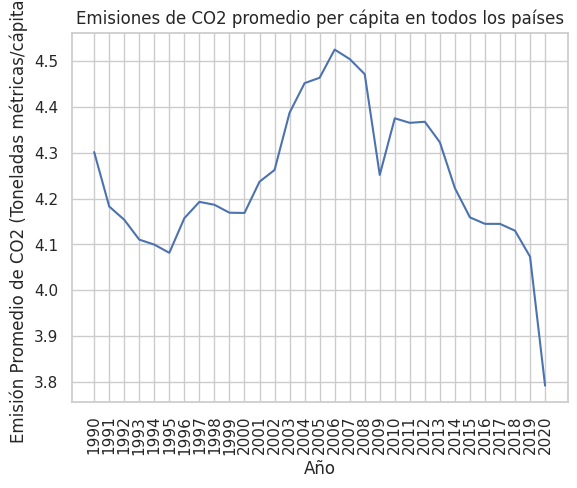

In [ ]:
# TENDENCIA GLOBAL PROMEDIO
#Assign x,y values
x = df_merge[df_merge.columns[2:33]].mean().index
y = df_merge[df_merge.columns[2:33]].mean()

# Plot
plt.plot(x,y)
plt.title("Emisiones de CO2 promedio per cápita en todos los países")
plt.ylabel("Emisión Promedio de CO2 (Toneladas métricas/cápita)")
plt.xticks(rotation=90)
plt.xlabel("Año")

Se desea saber la tendencia de emisiones para cada país

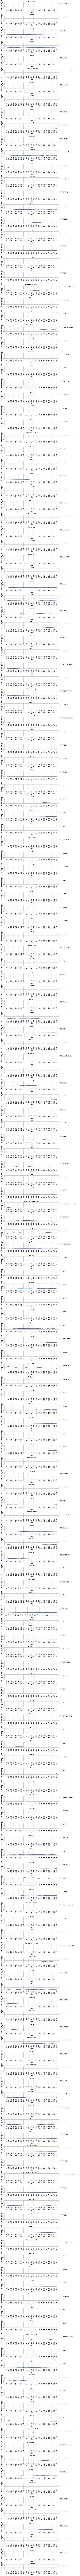

In [ ]:
# Seleccionar solo las columnas relevantes para el análisis
df_tendencias = df_merge.copy()
df_tendencias = df_tendencias.sort_values(by = 'Country Name')

# Transponer el DataFrame para tener los años en el eje x
df_tendencias = df_tendencias.set_index(['Country Name', 'Country Code']).T

# Crear una figura compuesta con un gráfico por cada país
fig, axs = plt.subplots(nrows=len(df_tendencias.columns.levels[0]), figsize=(12, 2 * len(df_tendencias.columns.levels[0])-1))

# Iterar sobre cada país y plotear la tendencia de emisiones
for i, country in enumerate(df_tendencias.columns.levels[0]):
    axs[i].plot(df_tendencias.index, df_tendencias[country], label=f'{country}')

    axs[i].set_title(country)
    axs[i].set_xlabel('Año')
    axs[i].set_ylabel('Emisiones de CO2')
    axs[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axs[i].tick_params(axis='x', rotation=90)

    # Establecer una escala fija en el eje y
    axs[i].set_ylim(0, 50) #la determinación de la cota se realizó en la celda posterior del Colab

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


In [ ]:
# Definir valor máximo para la escala del eje y
# Todos los gráficos deben tener la misma escala para poder comparar
maximos_por_fila = df_tendencias.max(axis=0)
maximos_por_fila.max()

47.6569620139265

<ipython-input-53-7e38d33111be>:15: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



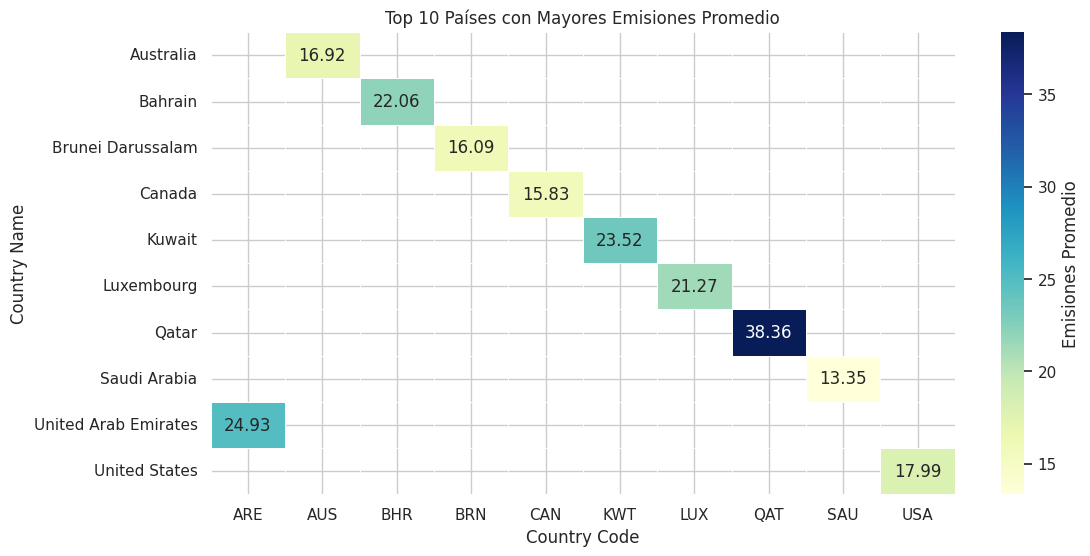

In [ ]:
# Seleccionar solo las columnas relevantes para el análisis
df_tendencias = df_merge.copy()

# Calcular el promedio de emisiones para cada país
df_promedio_paises = df_tendencias.set_index(['Country Name', 'Country Code']).mean(axis=1).reset_index()

# Seleccionar los 10 países con mayores emisiones promedio
top_paises = df_promedio_paises.nlargest(10, 0)

# Renombrar la columna para tener un nombre más descriptivo
top_paises = top_paises.rename(columns={0: 'Emisiones Promedio'})

# Crear un mapa de calor con una barra cromada
plt.figure(figsize=(12, 6))
sns.heatmap(top_paises.pivot('Country Name', 'Country Code', 'Emisiones Promedio'),
            annot=True,
            cmap='YlGnBu',
            cbar_kws={'label': 'Emisiones Promedio'},
            linewidths=.5,
            fmt=".2f")

plt.title('Top 10 Países con Mayores Emisiones Promedio')
plt.show()


In [ ]:
# Top 10 de países
top_paises

Country Name Country Code  Emisiones Promedio
143                 Qatar          QAT           38.361207
4    United Arab Emirates          ARE           24.925986
94                 Kuwait          KWT           23.522313
17                Bahrain          BHR           22.059208
104            Luxembourg          LUX           21.267820
180         United States          USA           17.986275
8               Australia          AUS           16.916520
25      Brunei Darussalam          BRN           16.086245
29                 Canada          CAN           15.834303
147          Saudi Arabia          SAU           13.350953

<ipython-input-55-3db211b254ff>:13: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



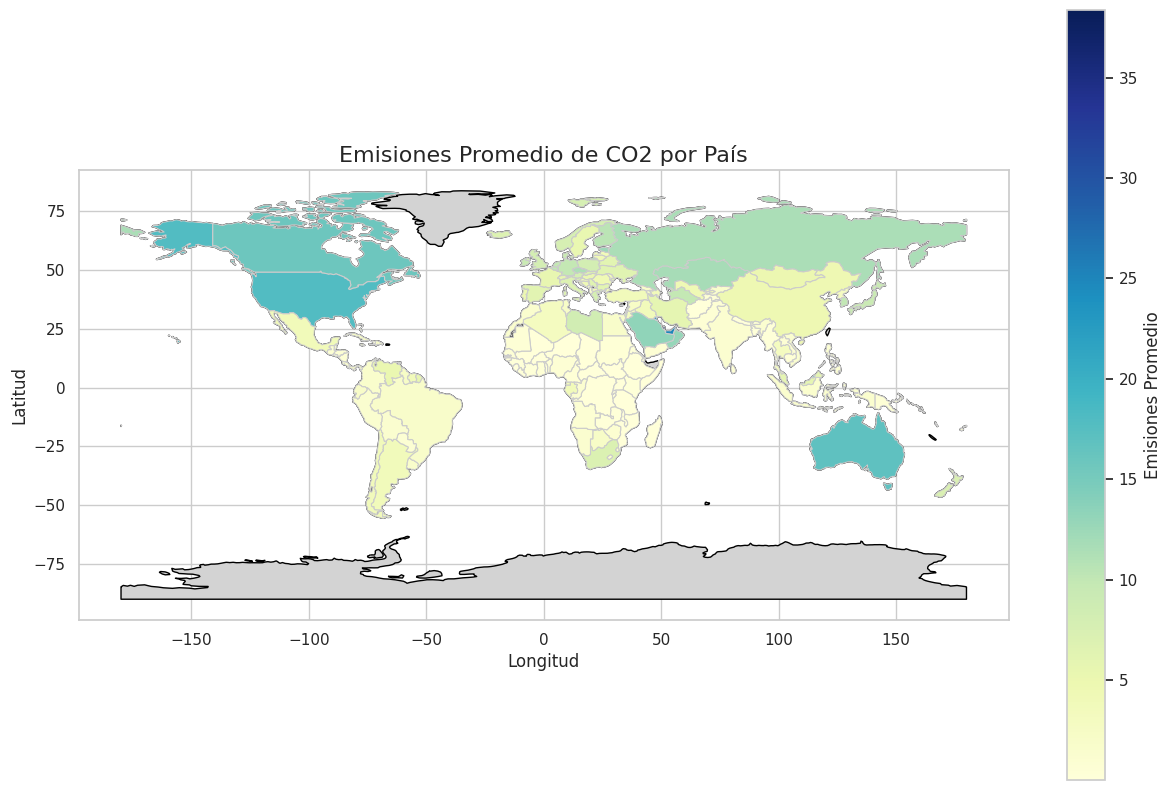

In [ ]:
import geopandas as gpd

df_emisiones = df_merge.copy()

# Seleccionamos solo las columnas relevantes para el análisis
df_tendencias = df_emisiones#.drop(['Region', 'IncomeGroup', 'SpecialNotes', 'TableName'], axis=1)

# Calculamos el promedio de emisiones para cada país
df_promedio_paises = df_tendencias.set_index(['Country Name', 'Country Code']).mean(axis=1).reset_index()
df_promedio_paises.columns = ['Country Name', 'Country Code', 'Emisiones Promedio']

# Cargamos un conjunto de datos geoespaciales del mundo (es necesario un archivo shapefile del mundo)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusionamos los datos geoespaciales con los datos de emisiones promedio
world_emisiones = world.merge(df_promedio_paises, how='left', left_on='iso_a3', right_on='Country Code')

# Configuramos el tamaño de la figura
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Mostramos el mapa del mundo
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Graficamos los países con emisión promedio
world_emisiones.plot(ax=ax, column='Emisiones Promedio', cmap='YlGnBu', legend=True,
                     legend_kwds={'label': "Emisiones Promedio"},
                     linewidth=0.8, edgecolor='0.8')
plt.title('Emisiones Promedio de CO2 por País', fontsize=16)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa
plt.show()


In [ ]:
# Se crea la columna 'EmAcum' que contiene las emisiones acumuladas por cada país a lo largo de todos los años
columnas_emisiones = df_merge.columns[2:].copy()

# Agrega una columna "EmAcum" con las emisiones acumuladas por cada país
df_merge['EmAcum'] = df_merge[columnas_emisiones].mean(axis=1)

# Muestra el DataFrame resultante
df_merge.sort_values(by = 'EmAcum', ascending=False).head(10)

Country Name Country Code       1990       1991       1992  \
199                 Qatar          QAT  28.399615  32.826856  31.143259   
8    United Arab Emirates          ARE  29.055796  30.653566  28.211854   
126                Kuwait          KWT  17.390733   5.840530  14.220246   
22                Bahrain          BHR  20.752003  19.324319  22.133298   
143            Luxembourg          LUX  29.553490  30.370543  29.159176   
250         United States          USA  19.407336  19.003390  19.022845   
13              Australia          AUS  15.437183  15.315271  15.353974   
31      Brunei Darussalam          BRN  12.447314  12.541688  12.924273   
35                 Canada          CAN  15.148969  14.740964  15.028139   
204          Saudi Arabia          SAU  10.709518  11.283883  11.690736   

          1993       1994       1995       1996       1997       1998  \
199  34.183536  36.931552  36.976276  39.568269  46.118807  45.615898   
8    28.615418  30.390241  30.882116  30.523276  29.656726  28.567575   
126  18.590810  22.345662  21.899600  20.917175  21.179210  23.156131   
22   22.773170  22.540143  22.083748  22.370361  22.088309  23.032399   
143  29.298195  26.830303  21.192781  21.091919  19.650018  17.813751   
250  19.218331  19.256185  19.216897  19.575367  20.330853  20.266287   
13   15.481705  15.730915  16.114602  16.471014  16.706176  17.602334   
31   13.796701  14.609759  15.381966  15.765066  16.682471  14.111734   
35   14.713309  15.060504  15.290466  15.592614  15.943848  16.076572   
204  11.388958  11.235012  10.843986  11.213254  11.037644  11.424979   

          1999       2000       2001       2002       2003       2004  \
199  47.288938  44.379251  42.205792  45.564691  46.416887  47.656962   
8    27.660390  25.868851  28.138659  27.285557  27.224873  27.547774   
126  24.363983  25.757494  26.705525  27.153745  27.656833  28.752425   
22   22.323571  22.315944  22.439114  23.013401  23.056822  21.509723   
143  18.398978  19.611964  20.652285  22.005491  22.676970  25.452799   
250  20.101123  20.469797  20.171537  19.445530  19.506506  19.597617   
13   17.737243  17.837318  17.930727  18.123211  17.894539  18.368871   
31   13.554710  14.128579  13.819010  13.296668  15.578528  14.156871   
35   16.258473  16.757467  16.331437  16.720411  17.208359  16.794186   
204  11.400494  11.586313  11.504347  12.034045  12.303148  12.673985   

          2005       2006       2007       2008       2009       2010  \
199  45.406087  43.288574  40.609452  36.889946  33.727304  35.548268   
8    27.202544  24.813970  22.448500  22.328149  19.645539  19.192796   
126  31.274316  30.649794  28.163544  28.611506  27.777790  27.426380   
22   22.944027  23.157405  22.105039  22.301397  20.956409  21.394807   
143  25.610438  24.791119  23.155338  22.557045  20.978820  21.755666   
250  19.469273  18.945917  19.042912  18.278491  16.808681  17.431737   
13   18.278473  18.292750  18.454738  18.239290  18.157201  17.973752   
31   13.610768  20.173387  18.860034  20.575035  20.174425  18.105658   
35   17.027568  16.595214  17.380631  16.559426  15.504506  15.794538   
204  12.923100  13.214987  13.432443  14.203754  14.272209  15.168386   

          2011       2012       2013       2014       2015       2016  \
199  37.979493  39.582140  37.602880  37.105034  35.290422  33.549569   
8    19.431780  20.275652  21.133916  21.122774  21.914502  22.280703   
126  26.493555  25.132421  23.958143  22.749990  22.775020  22.572698   
22   21.465303  22.184125  22.868842  23.096571  22.385625  21.495310   
143  21.041503  20.148942  18.722946  17.333940  16.034649  15.198775   
250  16.604190  15.789760  16.111175  16.040917  15.560015  15.149883   
13   17.656055  17.405618  16.794588  16.155745  16.198458  16.320331   
31   18.262990  17.951032  17.509752  16.993155  15.180679  16.358212   
35   15.998272  15.736824  15.840810  15.852177  15.649907  15.421823   
204  15.381398  15.978016  15.983919  16.8252

In [ ]:
import plotly.express as px

# Supongamos que df_merge es el DataFrame con las emisiones de CO2 y la columna "EmAcum"
# Se debe tener las columnas correctamente etiquetadas con los años y los datos limpios

# Utiliza Plotly Express para crear el mapa interactivo
fig = px.choropleth(
    df_merge,
    locations='Country Code',
    color='EmAcum',
    hover_name='Country Name',
    color_continuous_scale='Viridis',
    title='Emisiones Acumuladas de CO2 por País',
    labels={'EmAcum': 'Emisiones Acumuladas de CO2'}
)

# Configura el diseño del mapa
fig.update_geos(projection_type="natural earth", showcoastlines=True, coastlinecolor="black", showland=True, landcolor="white")

# Muestra el mapa interactivo
fig.show()

#si se hace zoom sobre el mapa, se observa que Qatar tiene la mayor emision acumulada. Buscar a que se debe. Lo mismo para los Emiratos Arabes y Kuwait

* Elegimos los paises que tienen emisiones más significativas y realizamos una regresión lineal para realizar una predicción acerca de sus emisiones.
* Buscas papers que justifiquen el comportamiento de las curvas a eleccion y los paises más emisores.
* Hacer un estimativo porcentual sobre cuanto aporta anualmente cada pais a nivel mundial.

Vamos a obtener el porcentaje de contribucion de cada pais en cada año a la totalidad de la emicion de dioxido de carbono mundial, para saber en cada año que pais fue el que mas contribuyo a esto mismo

In [ ]:
porcentaje_emision = df_merge[df_merge.columns[:-2]].copy()

# Obtenemos una lista con los años que se utilizan en el analisis y la emision total historica
emision_total_historica = porcentaje_emision.iloc[:, 2:].sum().sum()
anios = list(porcentaje_emision.columns[2:])

# Iteramos sobre los años y sacamos la emision total de ese año, luego corroboramos la emision de cada pais para ese año y lo evaluamos como porcentaje, por ultimo reemplazamos el dato
for anio in anios:
    emision_anio_actual = porcentaje_emision[anio].sum()
    for index, row in porcentaje_emision.iterrows():
        pais = row['Country Name']
        emision_pais = row[anio]
        porcentaje_contribucion = (emision_pais / emision_anio_actual) * 100

        # Puedes imprimir o almacenar estos valores como desees
        porcentaje_emision.at[index, anio] = porcentaje_contribucion

porcentaje_emision

Country Name Country Code      1990      1991      1992  \
2             Afghanistan          AFG  0.023419  0.022615  0.015947   
4                  Angola          AGO  0.067904  0.068319  0.068620   
5                 Albania          ALB  0.225639  0.157848  0.086925   
6                 Andorra          AND  0.928989  0.918349  0.894897   
8    United Arab Emirates          ARE  3.555319  3.836954  3.555921   
..                    ...          ...       ...       ...       ...   
259                 Samoa          WSM  0.064751  0.072491  0.076384   
261           Yemen, Rep.          YEM  0.060767  0.076553  0.079728   
262          South Africa          ZAF  0.759790  0.741300  0.720695   
263                Zambia          ZMB  0.043631  0.045685  0.044458   
264              Zimbabwe          ZWE  0.200053  0.220737  0.218764   

         1993      1994      1995      1996      1997      1998      1999  \
2    0.013897  0.012341  0.011388  0.010361  0.009435  0.008913  0.007315   
4    0.090556  0.107181  0.117270  0.135213  0.135652  0.136463  0.139367   
5    0.082028  0.083002  0.078507  0.078234  0.058669  0.072135  0.120594   
6    0.883580  0.850947  0.866336  0.891997  0.898342  0.941946  0.981150   
8    3.644781  3.881071  3.961173  3.844090  3.703303  3.572674  3.473586   
..        ...       ...       ...       ...       ...       ...       ...   
259  0.083620  0.076282  0.085511  0.093717  0.090292  0.101291  0.100003   
261  0.072679  0.076688  0.083888  0.081859  0.084963  0.088464  0.097465   
262  0.738149  0.744053  0.770582  0.772766  0.795765  0.807868  0.753703   
263  0.038721  0.032307  0.031453  0.024926  0.031248  0.028995  0.023024   
264  0.201478  0.187711  0.180647  0.167444  0.151948  0.152402  0.169542   

         2000      2001      2002      2003      2004      2005      2006  \
2    0.006929  0.006833  0.008207  0.008713  0.006453  0.009427  0.010386   
4    0.124140  0.116387  0.110028  0.110393  0.109360  0.095355  0.095031   
5    0.129560  0.130605  0.151459  0.162447  0.167948  0.159546  0.157832   
6    0.995595  0.954711  0.921130  0.863826  0.857034  0.845335  0.787477   
8    3.249001  3.477297  3.351690  3.249148  3.240039  3.191006  2.871314   
..        ...       ...       ...       ...       ...       ...       ...   
259  0.101427  0.108304  0.112024  0.107731  0.109440  0.111381  0.108211   
261  0.101336  0.103707  0.100552  0.110542  0.111349  0.116122  0.115462   
262  0.763185  0.838314  0.853784  0.875866  0.920312  0.903756  0.887837   
263  0.022947  0.022253  0.022478  0.022951  0.022142  0.023259  0.021047   
264  0.144106  0.140534  0.126002  0.099850  0.093547  0.100332  0.091890   

         2007      2008      2009      2010      2011      2012      2013  \
2    0.012780  0.019389  0.029495  0.036409  0.049053  0.040168  0.036105   
4    0.094322  0.104056  0.115692  0.116793  0.118001  0.113598  0.124881   
5    0.166669  0.167247  0.183751  0.196598  0.212076  0.187725  0.200624   
6    0.800963  0.829278  0.861466  0.864486  0.834529  0.822663  0.808393   
8    2.609491  2.614616  2.419301  2.296906  2.330748  2.430679  2.559770   
..        ...       ...       ...       ...       ...       ...       ...   
259  0.113694  0.103492  0.112453  0.118279  0.119731  0.119867  0.119159   
261  0.119471  0.121553  0.136160  0.123003  0.108054  0.096060  0.124896   
262  0.923422  0.989099  0.973118  0.983446  0.936538  0.963207  0.983074   
263  0.018573  0.019915  0.022980  0.023054  0.025650  0.032768  0.033698   
264  0.091070  0.071952  0.073547  0.088714  0.104584  0.108039  0.109160   

         2014      2015      2016      2017      2018      2019  
2    0.035174  0.037510  0.033898  0.035520  0.037915  0.038247  
4    0.135332  0.141645  0.127900  0.104809  0.095818  0.096867  
5    0.222646  0.209628  0.200848  0.237547  0.235117  0.224863  
6    0.799215  0.816468  0.816658  0.796065  0.835945  0.808111  
8    2.618960  2.758730  2.814369  2.673572

In [ ]:
# Porcentaje de emisión para Qatar
porcentaje_emision[porcentaje_emision['Country Name'] == 'Qatar']

Country Name Country Code      1990      1991      1992      1993  \
199        Qatar          QAT  3.475027  4.108988  3.925406  4.353999   

         1994      1995      1996     1997      1998      1999      2000  \
199  4.716447  4.742856  4.983213  5.75896  5.704745  5.938535  5.573817   

         2001      2002      2003      2004     2005      2006      2007  \
199  5.215674  5.597054  5.539615  5.605188  5.32638  5.009077  4.720583   

         2008      2009      2010      2011      2012      2013     2014  \
199  4.319795  4.153437  4.254254  4.555456  4.745173  4.554514  4.60056   

         2015      2016      2017     2018      2019  
199  4.442572  4.237787  4.074577  3.99092  4.097263

Calculamos cuanto contribuyo cada pais a la emision de dioxido de carbono total historica

In [ ]:
# Calculamos el porcentaje de emision historica de cada pais en comparacion a la emicion total de todos los años a nivel mundial
porcentaje_emision['PorcentajeHistorico'] = (df_merge['EmAcum'] / emision_total_historica) * 100

porcentaje_emision.sort_values(by = 'PorcentajeHistorico', ascending=False).head(10)

Country Name Country Code      1990      1991      1992  \
199                 Qatar          QAT  3.475027  4.108988  3.925406   
8    United Arab Emirates          ARE  3.555319  3.836954  3.555921   
126                Kuwait          KWT  2.127961  0.731068  1.792370   
22                Bahrain          BHR  2.539252  2.418855  2.789759   
143            Luxembourg          LUX  3.616217  3.801527  3.675325   
250         United States          USA  2.374716  2.378683  2.397706   
13              Australia          AUS  1.888921  1.917036  1.935269   
31      Brunei Darussalam          BRN  1.523075  1.569862  1.629021   
35                 Canada          CAN  1.853655  1.845149  1.894200   
204          Saudi Arabia          SAU  1.310436  1.412421  1.473541   

         1993      1994      1995      1996      1997      1998      1999  \
199  4.353999  4.716447  4.742856  4.983213  5.758960  5.704745  5.938535   
8    3.644781  3.881071  3.961173  3.844090  3.703303  3.572674  3.473586   
126  2.367934  2.853715  2.809008  2.634301  2.644696  2.895916  3.059624   
22   2.900646  2.878552  2.832628  2.817315  2.758217  2.880442  2.803389   
143  3.731747  3.426439  2.718346  2.656308  2.453742  2.227796  2.310540   
250  2.447862  2.459165  2.464904  2.465314  2.538760  2.534511  2.524295   
13   1.971924  2.008961  2.066980  2.074353  2.086138  2.201356  2.227439   
31   1.757303  1.865780  1.973007  1.985446  2.083178  1.764820  1.702198   
35   1.874052  1.923344  1.961270  1.963728  1.990945  2.010543  2.041736   
204  1.450625  1.434799  1.390931  1.412193  1.378296  1.428813  1.431672   

         2000      2001      2002      2003      2004      2005      2006  \
199  5.573817  5.215674  5.597054  5.539615  5.605188  5.326380  5.009077   
8    3.249001  3.477297  3.351690  3.249148  3.240039  3.191006  2.871314   
126  3.235015  3.300194  3.335499  3.300700  3.381725  3.668646  3.546598   
22   2.802774  2.772963  2.826909  2.751712  2.529872  2.691459  2.679627   
143  2.463167  2.552152  2.703100  2.706379  2.993638  3.004243  2.868670   
250  2.570907  2.492742  2.388641  2.328001  2.304979  2.283851  2.192300   
13   2.240280  2.215829  2.226210  2.135621  2.160460  2.144164  2.116720   
31   1.774481  1.707715  1.633330  1.859217  1.665065  1.596617  2.334335   
35   2.104656  2.018193  2.053894  2.053729  1.975253  1.997426  1.920292   
204  1.455184  1.421675  1.478232  1.468317  1.490654  1.515950  1.529154   

         2007      2008      2009      2010      2011      2012      2013  \
199  4.720583  4.319795  4.153437  4.254254  4.555456  4.745173  4.554514   
8    2.609491  2.614616  2.419301  2.296906  2.330748  2.430679  2.559770   
126  3.273828  3.350394  3.420769  3.282263  3.177774  3.012917  2.901844   
22   2.569566  2.611483  2.580732  2.560432  2.574659  2.659470  2.769907   
143  2.691656  2.641419  2.583492  2.603618  2.523827  2.415489  2.267750   
250  2.213614  2.140403  2.069949  2.086150  1.991592  1.892903  1.951408   
13   2.145242  2.135812  2.236016  2.151016  2.117758  2.086615  2.034184   
31   2.192355  2.409327  2.484432  2.166802  2.190557  2.152000  2.120806   
35   2.020384  1.939101  1.909343  1.890218  1.918915  1.886557  1.918661   
204  1.561433  1.663253  1.757588  1.815283  1.844924  1.915471  1.935995   

         2014      2015      2016      2017      2018      2019  \
199  4.600560  4.442572  4.237787  4.074577  3.990920  4.097263   
8    2.618960  2.758730  2.814369  2.673572  2.416404  2.590364   
126  2.820714  2.867057  2.851252  2.767667  2.720693  2.716566   
22   2.863686  2.818038  2.715163  2.645851  2.629003  2.835863   
143  2.149192  2.018539  1.919821  1.907781  1.943615  1.969512   
250  1.988873  1.958789  1.913645  1.872435  1.929796  1.886009   
13   2.003110  2.039160  2.061489  2.039786  2.011063  2.004561   
31   2.106939  1.911036  2.066274  2.140207  2.201063  2.070910   
35   1.965472  1.970105  1.947995  1.963882  1.982297  1.934770   
204  2

Vamos a revisar la tendencia de los 10 paises que mas emisiones de dioxido de carbono realizan para intentar determinar cual seria la tendencia de los mismo para los siguientes años, si su emision disminuira, aumentara o se mantendra igual

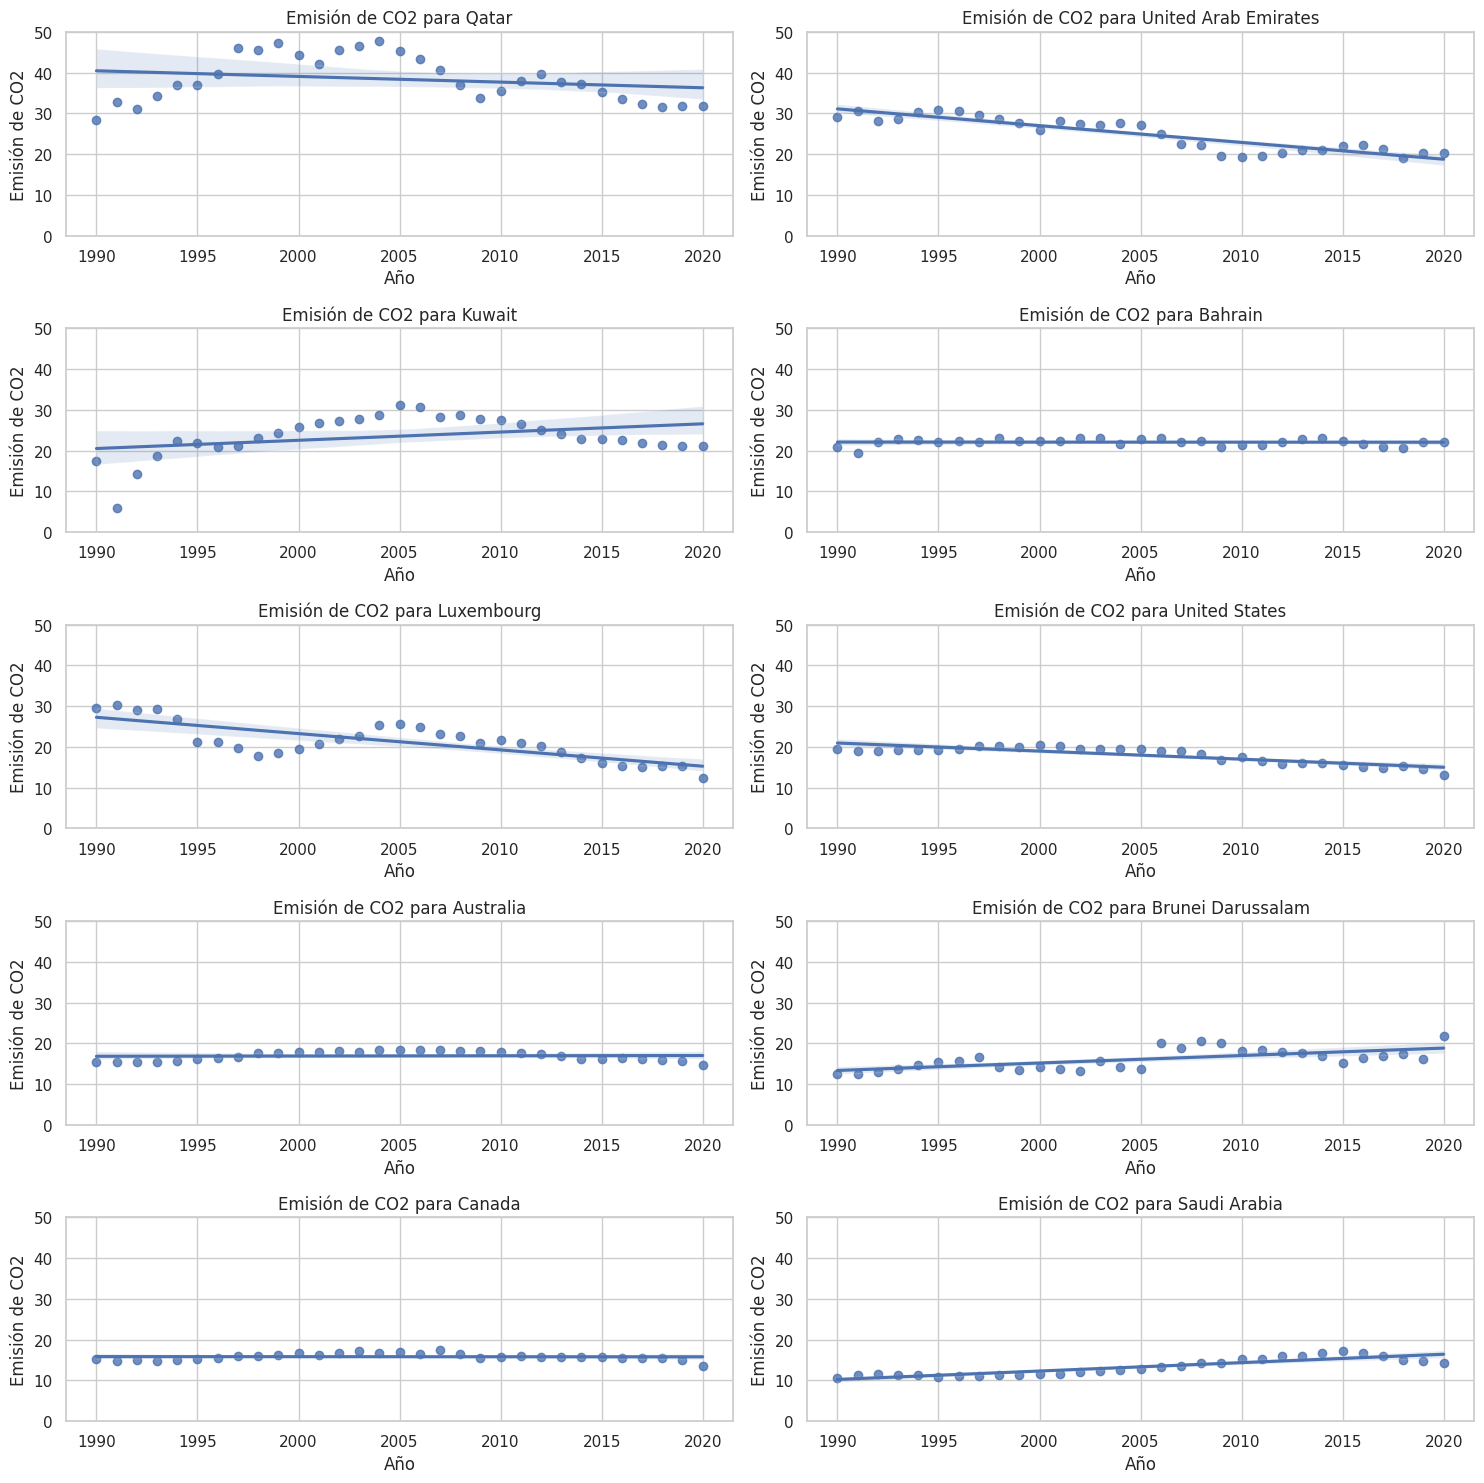

In [ ]:
# Creamos una copia del dataframe, pero solo de los 10 paises que mas emisiones de dioxido de carbono realizan
df_c = df_merge.sort_values(by = 'EmAcum', ascending=False).head(10).copy()
top_paises_mayor_emision = df_c[df_c.columns[:-1]]

sns.set(style="whitegrid")

# Configurar la cuadrícula de subgráficos
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Iterar sobre cada país para hacer un diagrama de dispersión por año
for index, (pais, ax) in enumerate(zip(top_paises_mayor_emision['Country Name'], axes.flatten())):
    # Creamos un dataframe de cada pais con las emisiones por año para poder graficar
    datos_pais = pd.DataFrame({'Anio': top_paises_mayor_emision.columns[2:], 'Emision': top_paises_mayor_emision.iloc[index, 2:]})

    datos_pais['Anio'] = pd.to_numeric(datos_pais['Anio'], errors='coerce')
    datos_pais['Emision'] = pd.to_numeric(datos_pais['Emision'], errors='coerce')

    sns.regplot(data = datos_pais, x = "Anio", y = "Emision",  label=pais, ax=ax) #logx=True,

    ax.set_title(f'Emisión de CO2 para {pais}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Emisión de CO2')

    # Establecer la escala de las ordenadas de 0 a 50
    ax.set_ylim(0, 50)


plt.tight_layout()
plt.show()

---
# Bibliografia
[Analisis hecho sobre el mundia de Qatar](https://legrandcontinent.eu/es/2022/12/15/la-huella-de-carbono-del-mundial-de-qatar/)
